<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">DATA PREPROCESSING</h1><br>

<br/><div style="font-family: Arial; color: darkblue; font-size: 14px; font-weight: 600"><a id="toc"></a>
In this part 4:
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[1. Dealing with missing data](#1)</p>
        <p style="margin: 0 0 0 4rem">[1a. Identifying missing values](#1a)</p>
        <p style="margin: 0 0 0 4rem">[1b. Eliminating data](#1b)</p>
        <p style="margin: 0 0 0 4rem">[1c. Imputing missing values](#1c)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[2. Handling categorical data](#2)</p>
        <p style="margin: 0 0 0 4rem">[2a. What is categorical data ?](#2a)</p>
        <p style="margin: 0 0 0 4rem">[2b. Mapping ordinal features](#2b)</p>
        <p style="margin: 0 0 0 4rem">[2c. Encoding class labels](#2c)</p>
        <p style="margin: 0 0 0 4rem">[2d. Performing one-hot encoding on nominal features](#2d)</p><br>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[3. Preparation of a dataset](#3)</p>
        <p style="margin: 0 0 0 4rem">[3a. Partitioning a dataset between a training and a test dataset](#3a)</p>
        <p style="margin: 0 0 0 4rem">[3b. Bringing features onto the same scale](#3b)</p><br>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[4. Selecting meaningful features](#4)</p>
        <p style="margin: 0 0 0 4rem">[4a. $L^1$ and $L^2$ regularizations](#4a)</p>
        <p style="margin: 0 0 0 4rem">[4b. $L^1$ and $L^2$ regularizers in scikit-learn](#4b)</p>
        <p style="margin: 0 0 0 4rem">[4c. Sequential feature selection algorithms](#4c)</p>
        <p style="margin: 0 0 0 4rem">[4d. Assessing feature importance with random forests](#4d)</p></div>

In [1]:
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The datasets we will use
df_wine = pd.read_csv('wine.data', header=None)

# Beautify the code results by using colors
from colorama import Fore, Back, Style
# Define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT

# Beautify the dataframes by using colors
def beautify(df):
    # df.style creates a Styler object from the DataFrame df, which allows styling to be applied to the
    # dataframe's representation; then 'set_table_styles' applies css styling (eg 'text-align: center')
    # to the table header cells (<th>) and data cells (<td>) of the dataframe
    styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('color', 'blue')]}, 
        {'selector': 'td', 'props': [('text-align', 'center'), ('color', 'magenta'), ('font-weight', 'bold')]}])    
    # The Styler object resets the precision of floats to 6 decimal places, whatever their original format; only
    # the display is affected, though, not the original data; here, the floats are float64 numbers and correspond
    # to prices, so I reformat their display to 2 decimal places
    return styled_df.format({col: '{:.2f}'.format for col in df.select_dtypes(include=['float64'])})

# Beautify figures by rendering them in SVG quality instead of JPG
# (don't use this if you prefer lightweight notebooks)
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
# we'll use the "cyberpunk" color map
cmap = plt.get_cmap("cool")

<a id="1"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. DEALING WITH MISSING DATA</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. Identifying missing values</font><a id="1a"></a></p>$\quad$
        It is not uncommon in real-world applications for our training examples to be missing one or more values for various reasons. There could have been an error in the data collection process, certain measurements may not be applicable, or particular fields could have been simply left blank in a survey, for example. We typically see missing values as blank spaces in our data table or as placeholder strings such as NaN, or NULL (a commonly used indicator of unknown values in relational databases). Unfortunately, most computational tools are unable to handle such missing values or will produce unpredictable results if we simply ignore them. Therefore, it is crucial that we
take care of those missing values before we proceed with further analyses.<br>
    Before we discuss several techniques for dealing with missing values, let’s create a simple example DataFrame from a comma-separated values (CSV) file to get a better grasp of the problem. We can see that the two missing values in our file have been replaced by 'NaN' in our dataframe 'df'. In a big dataset it may be useful to check if some feature do miss some data, and how many; we can do this by code : 'print(df.isnull().sum())'.

In [2]:
# The '''<string>''' allows us to write a string over several lines; we could also write
# csv_data = "A,B,C,D\n1.0,2.0,3.0,4.0\n5.0,6.0,,8.0\n10.0,11.0,12.0";
csv_data = '''
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# 'StringIO' transforms a string as if it were a '.csv' file on the disk
df = pd.read_csv(StringIO(csv_data))
print(BB + "df =\n" + MB, df)

# df.isnull() returns an array of the same shape as 'df', each entry being 'True' iff
# the corresponding entry in 'df' is null, and 'False' otherwise
# by default, the 'sum()' is applied to the columns, and is equivalent to 'sum(axis=0)'
df2 = df.isnull().sum()
print(BB + "\ndf.isnull().sum() =\n" + Fore.MAGENTA, df.isnull().sum())

df =
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

df.isnull().sum() =
 A    0
B    0
C    1
D    1
dtype: int64


<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. Eliminating data</font><a id="1b"></a></p>$\quad$
        One of the easiest ways to deal with missing data is simply to remove the corresponding features (columns) or training examples (rows) from the dataset entirely; this is done via the dropna method, which can also remove columns or rows  depending on some arguments :

In [3]:
# 'df.dropna(axis=0)' removes rows where at least one element is missing (ie is 'NaN' or 'None')
print(BB + "df.dropna(axis=0) =\n" + MB, df.dropna(axis=0))

# while 'df.dropna(axis=1)' removes columns where at least one element is missing
print(BB + "\ndf.dropna(axis=1) =\n" + MB, df.dropna(axis=1))

# 'df.dropna(how='all')' removes rows full of missing elements
print(BB + "\ndf.dropna(how='all') =\n" + MB, df.dropna(how='all'))

# 'df.dropna(thresh=4)' removes rows that have fewer than 4 real values
print(BB + "\ndf.dropna(thresh=4) =\n" + MB, df.dropna(thresh=4))

# 'df.dropna(subset=[<column names>])' only removes rows where a missing value appear in specific
# columns (here: 'C')
print(BB + "\ndf.dropna(subset=['C']) =\n" + MB, df.dropna(subset=['C']))

df.dropna(axis=0) =
      A    B    C    D
0  1.0  2.0  3.0  4.0

df.dropna(axis=1) =
       A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0

df.dropna(how='all') =
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

df.dropna(thresh=4) =
      A    B    C    D
0  1.0  2.0  3.0  4.0

df.dropna(subset=['C']) =
       A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1c. Imputing missing values</font><a id="1c"></a></p>$\quad$
        Although the removal of missing data seems to be a convenient approach, it also comes with certain disadvantages; for example, we may end up removing too many samples, which will make a reliable analysis impossible. Or, if we remove too many feature columns, we will run the risk of losing valuable information that our classifier needs to discriminate between classes. In this case, we can use different interpolation techniques to estimate the missing values from the other training examples in our dataset.<br>
    One of the most common interpolation techniques is mean imputation, where we simply replace the missing value with the mean value of the entire feature column. A convenient way to achieve this is by using the '$\,$<font color='green'>SimpleImputer</font>$\,$' class from <font color='green'>scikit-learn</font>, as shown in the following code. The default value for its 'strategy' parameter is '<font color='green'>mean</font>'; another useful possibility is '<font color='green'>most_frequent</font>' which is great with strings or for classes, and returns the most frequent value along each column, and if there is a tie then only the smallest is returned (whatever it means according to <font color='green'>scikit-learn</font>).

In [4]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(BB + "imputed_data =\n" + MB, imputed_data)

imputed_data =
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        A more convenient way to achieve the same result is by using pandas' '$\,$<font color='green'>fillna</font>$\,$' method and providing an imputation method as an argument. For example :

In [5]:
print(BB + "imputed_data =\n" + MB, df.fillna(df.mean()))

imputed_data =
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0


<a id="2"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. HANDLING CATEGORICAL DATA</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2a. What is categorical data ?</font><a id="2a"></a></p>$\quad$
        In machine learning '$\,$<font color='darkpink'>categorical data</font>$\,$' or '$\,$<font color='darkpink'>qualitative data</font>$\,$' refers to variables whose values are not numbers.<br>$\quad$
        There are two main types of categorical data:<br>
    * '$\,$<font color='darkpink'>nominal data</font>$\,$', which represents categories with no inherent order or ranking. Examples include colors (red, blue, green), types of animals (cat, dog, bird), or gender (male, female).<br>
    * '$\,$<font color='darkpink'>ordinal data</font>$\,$', which represents categories with a meaningful order or ranking. However, the intervals between the categories are not uniform or meaningful. Examples include survey responses (strongly agree, agree, neutral, disagree, strongly disagree) or education levels (high school, college, graduate).<br>$\quad$
        In machine learning, dealing with categorical data often involves converting it into a numerical format that can be used by algorithms. This process is known as '$\,$<font color='darkpink'>encoding</font>$\,$'. Common encoding techniques include '$\,$<font color='darkpink'>label encoding</font>$\,$', which assigns a unique integer to each category and '$\,$<font color='darkpink'>one-hot encoding</font>$\,$', which creates one column for each possible value of a feature (so $k$ columns when the feature can take $k$ possible values) and then for each instance it assigns a $1$ or a $0$ to each column depending on whether the instance belongs to it or not (so $1$ column with a $1$ and $(k\!-\!1)$ columns with a $0$).<br>$\quad$
        In the following dataframe, each instance has a nominal feature (its color), an ordinal feature (its size), a numerical feature (its price) and a label :

In [6]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'], ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df)

,color,size,price,classlabel
0,green,M,10.10,class2
1,red,L,13.50,class1
2,blue,XL,15.30,class2


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2b. Mapping ordinal features</font><a id="2b"></a></p>$\quad$
        We can encode the sizes of the previous dataframe via an arbitrary mapping, for example :

In [7]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df)

,color,size,price,classlabel
0,green,1,10.10,class2
1,red,2,13.50,class1
2,blue,3,15.30,class2


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If we want to transform the integer values back to the original string representation at a later stage, we can simply define a reverse-mapping dictionary :

In [8]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df)

,color,size,price,classlabel
0,green,M,10.10,class2
1,red,L,13.50,class1
2,blue,XL,15.30,class2


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2c. Encoding class labels</font><a id="2c"></a></p>$\quad$
        Many machine learning libraries require that class labels are encoded as integer values. Although most estimators for classification in <font color='green'>scikit-learn</font> convert class labels to integers internally, it is considered good practice to convert class labels into integers manually anyway.<br>$\quad$
        To encode the class labels, we can use an approach similar to the mapping of ordinal features just discussed. Class labels are not ordinal, and it doesn’t matter which integer number we assign to a particular string label; but the set of integers used for encoding the labels depends on the choice of the classifier (eg $\{0,1\}$ for logistic regression, or $\{-1,1\}$ for SVM). Here, we encode our labels in $\{0,1\}$:

In [9]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df)

,color,size,price,classlabel
0,green,M,10.10,1
1,red,L,13.50,0
2,blue,XL,15.30,1


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can again reverse the key-value pairs in the mapping dictionary to map the converted class
labels back to the original string representation :

In [10]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df)

,color,size,price,classlabel
0,green,M,10.10,class2
1,red,L,13.50,class1
2,blue,XL,15.30,class2


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The <font color='green'>scikit-learn</font> class '$\,$<font color='green'>LabelEncoder<font color='darkblue'>$\,$' encodes target labels with values between $0$ and $\,n_{classes}-1$ :

In [11]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
#* as usual the 'fit_transform' method is just a shortcut for first calling fit and then transform
#* '.values' transforms a pd series (ie a column of a pd dataframe) into an np 1d array; sk-learn
# classes often expect np arrays, though not 'LabelEncounter' so '.values' is optional here
y = class_le.fit_transform(df['classlabel'].values)
print(BB + "y =" + MB, y)

y = [1 0 1]


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Once the classification task is complete we could transform the integer class labels back into their original string representation using the '$\,$<font color='green'>inverse_transform</font>$\,$' method; for example :

In [12]:
print(BB + "predictions =" + MB, class_le.inverse_transform(y))

predictions = ['class2' 'class1' 'class2']


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2d. Performing one-hot encoding on nominal features</font><a id="2d"></a></p>$\quad$
        We could use the techniques presented in the previous section to encode the colors in our array; for example <font color='green'>scikit-learn</font>'s '<font color='green'>LabelEncoder</font>' class would attribute the values $0$, $1$ and $2$ to "blue", "green" and "red" respectively. <font color='darkpink'>But doing so would be a mistake</font> because a classifier would then interpret "red" as further away from "blue" than "green" is, which makes no sense.<br>$\quad$
        A common workaround for this problem is to use one-hot encoding (see [2a.](#2a)). To perform this transformation, we can use the '$\,$<font color='green'>OneHotEncoder</font>$\,$' that is implemented in <font color='green'>scikit-learn</font>'s '<font color='green'>preprocessing</font>' module, but it is cumbersome. There is also the '$\,$<font color='green'>ColumnTransformer</font>$\,$' from <font color='green'>scikit-learn</font>'s '<font color='green'>compose</font>' module. But the most convenient way is to use pandas' '$\,$<font color='green'>get_dummies</font>$\,$' function; we specify the column that we want to transform via one-hot encoding and specify 'int' as the desired type because by default the values of the one-hot columns are 'True' and 'False' :

In [13]:
df_encoded = pd.get_dummies(df, columns=['color'], dtype=int)

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df_encoded)

,size,price,classlabel,color_blue,color_green,color_red
0,M,10.10,class2,0,1,0
1,L,13.50,class1,0,0,1
2,XL,15.30,class2,1,0,0


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        One-hot encoding adds as many columns as a nominal feature has categories, giving them too much importance. We could safely suppress one column, since if an instance belongs to the removed category, it will still be recognisable, having all its entries $0$ for this feature. Another way to reduce the number of added columns is called '$\,$<font color='green'>binary encoding</font>$\,$' : say the nominal feature that we consider has $k$ categories; we need $k' := \lceil \log_2(k) \rceil$ (the smallest integer greater than $\log_2(k)$) columns to write $k$ in base $2$; we add $k'$ columns to our training matrix; each category is associated with an integer in $\{0,\cdots,k-1\}$ so it can be uniquely represented in our $k'$ columns.<br>
    The binary classifier is not yet available in <font color='green'>scikit-learn</font>, but it is in the <font color='green'>scikit-learn</font> compatible category_encoders library: https://contrib.scikit-learn.org/category_encoders/binary.html that we can download via 'pip' and then use as other <font color='green'>scikit-learn</font> classes with '<font color='green'>fit_transform</font>'.

<a id="3"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. PREPARATION OF A DATASET</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3a. Partitioning a dataset between a training and a test dataset</font><a id="3a"></a></p>$\quad$
        The wine dataset is another open-source dataset that is available from the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine). It consists of 178 wine examples with 13 features describing their different chemical properties.<br>$\quad$
        Initially, when we read the CSV file and create the dataframe, the columns are assigned default numerical indices. So, first, let's replace those default column names with their specified names.<br>
    (Since the $15$ columns of the dataframe may not entirely fit on the page, scrolling to the right may be necessary to view the last columns. I have included an image from the author's website below so that the entire dataframe can be seen without scrolling.)

In [14]:
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(Fore.BLUE + Style.BRIGHT + "Class labels : " + Fore.MAGENTA, np.unique(df_wine['Class label']))

# Apply our 'beautify' function (from cell 1) to render the dataframe
beautify(df_wine.head())

Class labels :  [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<figure style="text-align: center;">
    <img src="4.1. A sample of the wine dataset.png" alt="The five first rows of the wine dataset, which have been presented through a code in the previous cell; the only advantage of this figure comparatively is that we can see all of its 15 columns without scrolling right." width="800" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The head of the wine dataset</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        First we split the dataframe vertically into a data matrix and its labels. And then we split it horizontally into our training and our test datasets.<br>
    Using the '$\,$<font color='green'>train_test_split</font>$\,$' function from <font color='green'>scikit-learn</font>’s '<font color='green'>model_selection</font>' module, we randomly split the X and y arrays into $30\%$ test data and $70\%$ training data. Obviously, the 'train_test_split' function always shuffles the training dataset internally before splitting; so specifying a fixed random seed (with '$\,$<font color='green'>random_state=1</font>$\,$') simply ensures reproducibility. At last, '$\,$<font color='green'>stratify = y</font>$\,$' ensures that the training and the test subsets have the same proportions of class labels as the input dataset.<br><br>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
    The proportion $70$-$30$ is general practice for small datasets. Fort large datasets, this proportion grows in favor of the training dataset; for example, if the dataset contains more than 100,000 training examples, it might be fine to withhold only 10,000 examples for testing.<br>
    Moreover, instead of discarding the allocated test data after model training and evaluation, it is a common practice to retrain a classifier on the entire dataset, as it can improve the predictive performance of the model. While this approach is generally recommended, it could lead to worse generalization performance if the dataset is small and the test dataset contains outliers, for example. Also, after refitting the model on the whole dataset, we don’t have any independent data left to evaluate its performance. Consequently, for large enough datasets we will often keep the test dataset, and rather split the training dataset to keep some examples as a <font color='purple'>validation dataset</font>.

In [15]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3b. Bringing features onto the same scale</font><a id="3b"></a></p>$\quad$
        Feature scaling is a crucial step in our preprocessing pipeline. Decision trees (and random forests) are one of the very few machine learning algorithms which will not benefit from feature scaling because it separates the data points without regard of their relative values, they are scale-invariant. Otherwise it is needed, unless we give too much importance to the features with the largest scalings.<br>$\quad$
        There are two main approaches for feature scaling :<br><br>
    <span style="margin-right: 5px; vertical-align: center; font-size: 14px; color: purple;">■</span><font color='darkpink'>Normalization</font><br/>$\quad$
        Normalization refers to the rescaling of the features to a range of $\left[0,1\right]$. Consider the $j$-th column $X_j$ of the training matrix $X$, and denote by $x_{j,\min}$ and $x_{j,\max}$ the $\min$ and the $\max$ of $X_j$ respectively. Normalization consists in replacing each element $x^{(i)}_j$ of $X_j$ with<br><font color='darkpink'>
        $$x^{(i)}_j \;:=\; \frac{x^{(i)}_j - x_{j,\min}}{x_{j,\max} - x_{j,\min}} \,\qquad (1)$$</font>
    and in doing this for every column of $X$, independently.<br>$\quad$
        Normalization is the method of choice in logistic regression (see part 3, "2. The logistic regression"), gradient boosting algorithms (part 7, "4. Gradient boosting"), k-means clustering (part 10, "1a. k-means clustering using scikit-learn") and neural networks (especially with ReLU activation functions, part 13, "3a. Preprocess the feature columns").<br>$\quad$
        Normalization is implemented in <font color='green'>scikit-learn</font>'s '<font color='green'>preprocessing</font>' module, with the class '$\,$<font color='green'>MinMaxScaler</font>$\,$'.<br>$\quad$
        <font color='purple'>Obviously we only fit the scaler to the training matrix because the test matrix is kept aside for testing, although we need to apply the same scaler to it because the predictors will expect scaled data</font> :</div>

In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<span style="margin-right: 5px; vertical-align: center; font-size: 14px; color: purple;">■</span><font color='darkpink'>Standardization</font><br/>$\quad$
        Standardization centralizes each feature, and give it a variance of $1$. More precisely, let $X_j$ be any column of $X$, $\mu_j$ its mean, and $\sigma_j$ its standard deviation; then each element $x^{(i)}_j$ of $X_j$ is replaced with<font color='darkpink'>
    $$x^{(i)}_j \;:=\; \frac{x^{(i)}_j - \mu_j}{\sigma_j} \,\qquad (2)$$</font>$\quad$
        Standardization is the method of choice in linear regression with gradient descent methods (see part 2, "2. Linear and polynomial regression"), Support Vector Machines (part 3, "3. Support vector machines"), k-Nearest Neighbors (part 3, "Appendix - k-nearest neighbors"), Principal Component Analysis (part 5, "1. Principal component analysis") and neural networks (especially with sigmoid or tanh activation functions, part 13, "3a. Preprocess the feature columns").<br>$\quad$
        Standardization is implemented in scikit-learn's '<font color='green'>preprocessing</font>' module, with the class '$\,$<font color='green'>StandardScaler</font>$\,$' :

In [17]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p>$\quad$
        There is a common argument about outliers, stating that the standardization is more robust to outliers, but the examples ChatGPT provided gave extremely close results : let's compare these two methods on a small dataset with one extravagant outlier. In the normalized case, the five smallest values are in an interval which covers $4\%$ of the whole interval, while they occupy $3.9988\%$ of their whole interval in the standardized case...<br>$\quad$
        Anyway, standardization is much more common throughout the book.

In [18]:
ex = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 100])
print(BB + "normalized values : " + MB, (ex - ex.min()) / (ex.max() - ex.min()))
print(BB + "standardized values : " + MB, np.round((ex - ex.mean()) / ex.std(), 3))

normalized values :  [0.   0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 1.  ]
standardized values :  [-0.387 -0.387 -0.351 -0.351 -0.316 -0.316 -0.28  -0.28  -0.245 -0.245
  3.159]


<a id="4"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>4. SELECTING MEANINGFUL FEATURES</font></h4>
    <div>$\quad$
        If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator of overfitting. Overfitting means the model fits the parameters too closely with regard to the particular observations in the training dataset, usually indicating that our model is too complex for the given training data. Common solutions to reduce the generalization error are :<font color='purple'>
* Collect more training data<br>
* Introduce a penalty for complexity via regularization<br>
* Choose a simpler model with fewer parameters<br>
* Reduce the dimensionality of the data</font></div>
    <p>$\quad$
        Collecting more training data is often not applicable; we will see in part 6 a technique to check if it is really useful. In the following sections, we will look at common ways to reduce overfitting by regularization and dimensionality reduction via feature selection, which leads to simpler models by requiring fewer parameters to be fitted to the data. Then, in the following part, we will take a look at feature extraction techniques.        

<br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4a. $L^1$ and $L^2$ regularizations</font><a id="4a"></a></p>$\quad$
        I have already presented $L^1$ and $L^2$ regularizations, and elastic net (the mix of both) in part 3 (in "2g. Overfitting and regularized linear models"). If $L$ is the unregularized loss function, then the regularized loss function is<br><font color='darkpink'>
    $$Lr(w) =  L(w) \; + \: \frac{\lambda}{m} \sum_{j=1}^n w_j^2 \; + \: \frac{\mu}{m} \sum_{j=1}^n \lvert w_j \rvert \quad ; \; \lambda , \mu \geq 0 \,\qquad (3)$$</font>$\quad$
    The bias is included as the $0$-th component of the weight vector $w$, but is not regularized since it does not correspond to a feature. $L^1$ (resp. $L^2$) regularization corresponds to $\,\lambda=0\,$ (resp. $\,\mu=0\,$).<br>$\quad$
        $L^1$ and $L^2$ regularizations add a penalty term to the loss function which results in less extreme weight values compared to a model trained with an unregularized loss function. The less important features will have close to or even $0$ weights.<br>
    $L^2$ regularization is differentiable and reduces the weights more evenly so it is more stable, less sensitive to small changes in the input data. I have already presented its mathematical advantages over $L^1$ regularization (see part 3, "2g."). But $L^1$ regularization encourages <font color='purple'>sparsity</font>, ie more feature weights will be zero, which is useful in practice if we have many irrelevant features; in this sense, $L^1$ regularization is a technique for features selection.<br>$\quad$
        Here we present how $L^1$ regularization encourages sparsity, restricting ourselves to the case of the $MSE\,$ cost function. "Since the MSE is spherical, it is easier to draw than the
loss function of logistic regression; however, the same concepts apply". The $MSE\,$ has been presented in part 2 (in "2a. Linear regression"); still with the bias as the $0$-th component of the weight vector, it is given by<br><font color='darkpink'>
    $$MSE(w) \;:=\; \frac{1}{m} \, \lVert Xw - y \rVert^2 \;=\; \frac{1}{m} \, \sum_{j=1}^m \left( x^{(i)}.w - y^{(i)} \right)^2 \,\qquad (4)$$</font>$\quad$
        Let's represent some of its contour lines in the $2d$ case, where the $\hat{y}^{(i)}$ represent the estimations for the $i$-th instance of the training matrix<br><font color='darkpink'>
    $$\hat{y}^{(i)} \;:=\; x^{(i)}.w \,\qquad (5)$$

<figure style="text-align: center;">
    <img src="4.2. Some contour lines of the MSE.png" alt="Figure showing some contour lines of the non-regularized MSE in two dimensions. The contours are ellipses, elongated horizontally and tilted toward the bottom right. They share the same center, which is also shown, and are nested within one another." width="450" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Some contour lines of the MSE</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
         The point corresponding to the minimal loss is not labeled on the diagram, but let's call it $I$, with coordinates $(a,b)$. The diagram corresponds to a situation where $0 < a < b$. The precise values of $a$ and $b$ do not carry any inherent meaning beyond their role in computing the predictions.<br>
    On the other hand, in this situation, the ellipses are more elongated along the horizontal axis, which means that a small variation along the vertical requires a larger variation along the horizontal for the cost to remain the same. This orientation indicates that the second feature is more important than the first (ie has a greater influence on the problem than the first).<br>
    I emphasize : the values of $a$ and $b$ and the orientation of the contour lines of the non regularized cost function (here the ellipses) are not related. The ideal coefficients by which to multiply $X_1$ and $X_2$ to get the best predictions do not indicate their variational effect relative to one another, ie the importance to get them right (eg the ideal value for $w_1$ might be $10$, but taking $w_1=0$ might yield almost identical predictions, in which case ignoring $X_1$ altogether would simplify the problem without losing much information).<br><br>$\quad$
        In the following diagram, we consider the contour lines of the $L^2$ regularization term $\,\frac{\lambda}{m} \lVert w \rVert^2\,$. They are the spheres centered at the origin $O$ of the cartesian coordinate system; in our $2d$ case they are the circles around $O=(0,0)$.<br>$\quad$
        The optimal weight incurs a loss with two components (see $(3)$) : the first corresponds to its cost in the non-regularized case, and the second corresponds to the penalty added by the regularization term, which is proportional to the square of its norm. I will call the first the non-regularized cost, and the second the regularization cost, or the penalty cost. The following diagram shows the point corresponding to this optimal weight; this point is not labeled, but I'll call it $W$. The contour line of the non-regularized cost containing $W$ is represented; in the illustrated situation (the $MSE\,$) it is an ellipse; this ellipse is not labeled, but I'll call it $\mathcal{E}$. The contour line of the regularization cost containing $W$ is also represented; in the $2d$ case it is a circle; this circle is not labeled, but I'll call it $\mathcal{C}$ :

<figure style="text-align: center;">
    <img src="4.3. L2 regularization with the MSE.png" alt="Figure showing the same contour lines of the non regularized MSE around its optimal minimal loss, still in two dimensions, but with the added contour lines of the regularization term, which are circles centered at the origin, O. The optimal weight vector for the regularized MSE is represented, on its ellipse and circle, showing both components of its cost." width="450" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">L2 regularization with the MSE</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The diagram suggests that $\mathcal{C}$ and $\mathcal{E}$ are tangent. This is indeed the case; otherwise, $\mathcal{C}$ would cross $\mathcal{E}$, meaning there would be points on $\mathcal{C}$ with a lower non-regularized cost, contradicting the fact that $W$ is optimal.<br>
    However, contrary to what the diagram suggests, $O$, $W$, and $I$ are generally not aligned. To see why, let’s denote by $\mathcal{T}$ the straight line tangent to both $\mathcal{C}$ and $\mathcal{E}$ at $W$. The lines $\mathcal{T}$ and $(OW)$ are always perpendicular, since the tangent to a circle is perpendicular to its radius. But, in general, $\mathcal{T}$ and $(WI)$ will not be perpendicular - this only happens in the special case where $[IW]$ is the semi-major or semi-minor axis of the ellipse, or when the ellipse is in fact a circle (then any radius could be considered a semi-major and a semi-minor). Although possible, these cases are marginal; so, usually, $O$, $W$, and $I$ are not aligned.<br>
    The points $O$, $W$ and $I$ appear to be aligned on the diagram, because the ellipses are almost circular.<br>$\quad$
        Moreover, in the illustrated case, where neither $a$ nor $b$ is $0$, $W$ will not lie on either the x-axis or the y-axis; its coordinates will be positive fractions of $a$ and $b$, respectively, though these fractions are generally different. Geometrically, this is equivalent to saying that $W$ will lie strictly within the square whose diagonal is $[OI]$, excluding the axes. Why is it so, you ask ? OK, let's suppose that $W$ belongs to an axis, say the y-axis. The tangent at $W$ to its circle would be perpendicular to the y-axis, ie parallel to the x-axis; and also, since $W$ is optimal the rest of the ellipse should be above the tangent; since the elipses are pointing towards the bottom right, this would imply that the center of the ellipse should be above $W$ and at its left, hence at the left of the y-axis, but it is at its right. If $W$ belonged to the x-axis, then its ellipse should be parallel to the y-axis and at the right of $W$, implying that its center would be under the x-axis but it is above.<br>
    This means that, <font color='darkpink'>for the MSE, the optimal weight vector under $L^2$ regularization will never be sparser than the one obtained without regularization</font>. This is a general feature of $L^2$ regularization, because it is very unlikely that a standard non regularized cost function contour line crosses an axis orthogonally, and even less likely that this crossing point would coincide with the contour line of the regularization cost of the optimal weight vector. So, <font color='darkpink'>in general, the optimal weight vector under $L^2$ regularization will not be sparser than the optimal weight vector under the non regularized cost</font>.

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        On the other hand, the contour lines of the $L^1$ regularization term are not spheres but hypercubes with vertices on the Cartesian axes. Let's add to our $2d$ figure the square containing the optimal weight vector for the $L^1$ regularization, along with this optimal weight vector :

<figure style="text-align: center;">
    <img src="4.4. L1 regularization with the MSE.png" alt="Figure again showing the elliptic contour lines of the non regularized MSE around its optimal minimal weight I in two dimensions, but with a contour line for the L1 regularization term (so a square, this time). The optimal weight for the regularized MSE is represented, on its ellipse and square, showing both components of its cost." width="450" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">L1 regularization with the MSE</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The situation represented on the diagram has the following characteristics : let $V=(0,v)$ be the vertex of the square with the highest ordinate; the tangent to the ellipse passing through $V$ has a slope in $[-45^\circ, 0]$. This implies that the whole ellipse lies strictly above the square, and any point on the square other than $V$ will have a strictly greater non regularized cost than $V$.<br>$\quad$
        Let's define the $L^1$ regularization cost as the term added to the non-regularized cost to obtain the total $L^1$-regularized cost. Since the square is the set of all the points which have the same $L^1$ regularization cost as $V$, say $C_V$, $V$ is the point, among all those with regularization cost $C_V$, which has the smallest non regularized cost. Note that, according to the diagram, if the optimal weight vector has a lower regularization cost than $C_V$ then its corresponding square will be nested inside the square containing $V$, and the ellipse passing through its vertex $V'$ of highest ordinate will again have a tangent at $V'$ inside $[-45^\circ, 0]$, hence this optimal weight vector will be $V'$, ie a point on the y-axis.<br>$\quad$
        For a sufficiently high regularization cost, the tangent to the ellipse at $V'$ will have a slope outside $[-45^\circ, 0]$ (first, below $-45^\circ$), and then $V'$ will no longer be the point on the square with the lowest non regularized cost (this point will be a point on the square inside the ellipse area). The ordinate $v_l$ at which this starts to be the case (ie for which the slope of the tangent to the ellipse when it crosses the y-axis is exactly $-45^\circ$) is higher (hence happens less often) when the ellipses are more horizontal, ie when the target vector depends less heavily on $X_1$. Note that the value of $v_l$ only depends on the non regularized cost function.<br>$\quad$
        To summarize, <font color='purple'>under $L^1$ regularization, the optimal weight $W$ is on the y-axis iff its norm is less than or equal to $v_l$. In which case, it is sparser than the optimal weight under the non regularized cost function. And the value of $v_l$ augments when the importance of $X_1$ relative to $X_2$ diminishes</font>.<br><br>$\quad$
        Let's briefly discuss the role of the coefficient $\mu$ (defined in $(3)$) in the sparsity of $W$.<br>$\quad$
        The optimal weight vector corresponds to the point that minimizes the $L^1$ regularized cost, so its total cost is less than or equal to the total cost of $O$, which is equal to the non regularized cost of $O$, $L(O)$. So, if $W$ has coordinates $W = \left( w_j \right)_{j=0}^n$, we'll have
        $$\frac{\mu}{m} \sum_{j=1}^n \lvert w_j \rvert \leq L(O) - L(W) \leq L(O)$$$\quad$
        Since we are in finite dimensions, all the norms are equivalent; so, if $\mu$ is chosen large enough, then $\lVert OW \rVert$ will be as small as we need it to be. In our $2d$ case with the $MSE\,$, if we choose $\mu$ large enough then $W$ will be inside the square centered at $O$ with vertex $(0,v_l)$, which implies that $W$ will lie on the y-axis.<br>
    More generally, the greater the coefficient $\mu$ will be, the sparser the weight vector under the corresponding $L^1$ regularization will be.<br><br>$\quad$
        To summarize : there are many situations akin to the one depicted in the diagram where the optimal weight vector for the $L^1$ regularized loss will lie on the y-axis, ie will have an abscissa $w_1 = 0$. By contrast, we have seen that the optimal weight vector for the $L^2$ regularized loss will never lie on the y-axis.<br>$\quad$
        This applies <font color='purple'>in any dimension and with any standard loss function : if some features are sufficiently less important than others, then the optimal weight vector $W$ under $L^1$ regularization will likely have $0$ for the corresponding components. And if the coefficient $\mu$ is large enough, then $W$ will be as sparse as we want it to be (but the cost will increasingly lose its relation with the data, so it's not advisable to choose too high a $\mu$)</font>. Hence <font color='darkpink'>$L^1$ regularization, with its "pointed" hypercube penalties, favors sparsity, while $L^2$ regularization does not</font>.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4b. $L^1$ and $L^2$ regularizers in scikit-learn</font><a id="4b"></a></p>$\quad$
        The book only presents the $L^1$ regularizer with a '<font color='green'>LogisticRegression</font>' (see part 3, "2e. Logistic regression with the Batch Gradient Descent"). I added an $L^2$ regularizer, so we can verify that, unlike the $L^1$ regularizer, it doesn't produce a sparse weight vector.<br>$\quad$
        Additionally, the book states that both regularizers yield $100\%$ accuracy (with <font color='green'>scikit-learn</font>'s $C:=\frac{1}{\lambda}=1$), which is only true on the training dataset. However, $100\%$ accuracy can be achieved on the test dataset with the $L^1$ regularizer if we slightly increase the regularization strength (by using $C=0.5$ instead).<br>$\quad$
        I also included a basic SVM; even without any additional regularization (beyond its inherent $L^2$ regularization), it achieves $100\%$ accuracy on both the training and test datasets.

In [19]:
from sklearn.linear_model import LogisticRegression
#* we want L1 regularization, which reduces the choice of the solver to 'liblinear' or 'saga'; the
# author chose 'liblinear', so for 'multi_class' only 'ovr' is available
#* C (default value 1.0) is a parameter used to control the strength of the regularization (smaller
# values specify stronger regularization); I changed its value to get 100% accuracy in both the
# training and the test datasets
lr = LogisticRegression(penalty='l1', C=.5, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print(BB + "Training accuracy : " + MB, lr.score(X_train_std, y_train))
print(BB + "Test accuracy : " + MB, lr.score(X_test_std, y_test))

# I add the L2 regularization case for comparison
lr2 = LogisticRegression(penalty='l2', C=.5, solver='liblinear', multi_class='ovr')
lr2.fit(X_train_std, y_train)
print(BB + "Training accuracy of the L2 regularizer : " + MB, lr2.score(X_train_std, y_train))
print(BB + "Test accuracy of the L2 regularizer : " + MB, lr2.score(X_test_std, y_test))

# I add an SVM for comparison
from sklearn.svm import SVC
# kernel='rbf' and C=1 are the default values
svm = SVC(kernel='rbf', gamma=0.1, C=1)
svm.fit(X_train_std, y_train)
print(BB + "Training accuracy of the SVM : " + MB, svm.score(X_train_std, y_train))
print(BB + "Test accuracy of the SVM : " + MB, svm.score(X_test_std, y_test))

Training accuracy :  1.0
Test accuracy :  1.0
Training accuracy of the L2 regularizer :  1.0
Test accuracy of the L2 regularizer :  0.9814814814814815
Training accuracy of the SVM :  1.0
Test accuracy of the SVM :  1.0


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    Since we use the 'ovr' method to classify the $3$ classes of the wine dataset, we have $3$ biases and $3$ weight vectors corresponding to the cases "class $0$ vs the rest", "class $1$ vs the rest" and "class $2$ vs the rest". We can get the biases via the property '$\,$<font color='green'>.intercept_<font color='darkblue'>$\,$' and the weight vectors via the property '$\,$<font color='green'>.coef_<font color='darkblue'>$\,$'. We can verify that there are many $0$ weights with the $L^1$ regularizer, and none with the $L^2$ regularizer.

In [20]:
print(BB + "Biases : " + MB, lr.intercept_)
print(BB + "Biases in the L2 reg case : " + MB, lr2.intercept_)

Biases :  [-0.87599728 -0.8524631  -1.7638636 ]
Biases in the L2 reg case :  [-1.01861522 -0.80873276 -1.60956708]


In [21]:
print(BB + "Weight vectors with the L1 regularizer :\n" + MB, lr.coef_)
print(BB + "Weight vectors with the L2 regularizer :\n" + MB, lr2.coef_)

Weight vectors with the L1 regularizer :
 [[ 1.04851422  0.          0.01609612 -0.89681245  0.          0.
   1.19004353  0.          0.          0.          0.          0.41139529
   1.95953736]
 [-1.36339176 -0.29115468 -0.38266436  0.32703212 -0.01309397  0.
   0.18330111  0.          0.12284145 -1.21591549  0.70754717  0.
  -1.67560654]
 [ 0.          0.21688442  0.21395703  0.          0.          0.
  -1.80318999  0.          0.          1.4005487  -0.67367256 -0.3718511
   0.        ]]
Weight vectors with the L2 regularizer :
 [[ 1.07563703  0.07469907  0.36456748 -1.15043293  0.07757771  0.33318068
   0.71806268 -0.12502005  0.05363124  0.10406111  0.09341307  0.64830355
   1.38007403]
 [-1.28875458 -0.49258405 -0.70218396  0.72285318 -0.29639925 -0.20423944
   0.45479921  0.23522641  0.24752714 -1.04576297  0.70328326  0.13094963
  -1.35616114]
 [ 0.3103387   0.41855143  0.34079478  0.27694609  0.2274293  -0.15255537
  -1.10613242 -0.15380643 -0.28412459  1.03292203 -0.779571

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    The author provides another example, this time varying the regularization strength and plotting
the regularization paths — the weight coefficients of the different features for different regularization strengths. The plot shows that all feature weights will be zero if we penalize the model with a strong regularization parameter ($C<10^{-2}$).

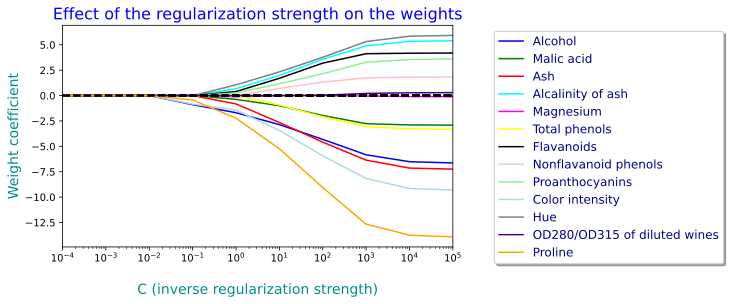

In [22]:
plt.figure(figsize=(7, 4))
plt.title("Effect of the regularization strength on the weights", fontsize=16, color='blue')
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen',
          'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr',
                            random_state=0)
    lr.fit(X_train_std, y_train)
    # 'lr.coef_[1]' is the weight vector corresponding to the case "class 1 vs the rest", "class 1" 
    # being the second class; 'lr.coef_[1]' is a row vector; the vectors are appended at the bottom
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
#* 'weights.shape[1]' is the number of columns in the 'weights' array, ie 13 (the number of features)
#* 'zip(range(weights.shape[1]), colors)' creates an iterator that generates pairs of elements, where
# each pair consists of an element from range(weights.shape[1]) and the corresponding element from
# colors. The iteration stops when the shorter of the two sequences (here both) is exhausted.
for column, color in zip(range(weights.shape[1]), colors):
    #* Each line represents how the weight coefficient for a specific feature changes with different
    # values of the regularization parameter C=10**c
    #* 'df_wine.columns[0]' corresponds to the labels of the wines
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)
    # 'plt.axhline(0,...)' corresponds to the horizontal line of ordinate 0
    plt.axhline(0, color='black', linestyle='--', linewidth=2)
    plt.xlim([10**(-4), 10**5])
    plt.ylabel('Weight coefficient', fontsize=14, color='darkcyan')
    plt.xlabel('\nC (inverse regularization strength)', fontsize=14, color='darkcyan')
    # use a logarithmic scale for the x-axis
    plt.xscale('log')
    #* the upper center of the legend box should be anchored at a point that is 1.4 times the width
    # of the plot to the right and 1 times the height of the plot above the bottom left corner of the
    # plot
    #* 'ncol=1' specify that the legend box should have 1 column only
    #* and 'fancybox=True' specify that it should have rounded corners
    plt.legend(loc='upper center', bbox_to_anchor=(1.4, 1), ncol=1, fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4c. Sequential feature selection algorithms</font><a id="4c"></a></p>$\quad$
        An alternative way to reduce the complexity of a model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models. There are two
main categories of dimensionality reduction techniques: feature selection and feature extraction. Via
'$\,$<font color='darkpink'>feature selection<font color='darkblue'>$\,$', we select a subset of the original features, whereas in '$\,$<font color='darkpink'>feature extraction<font color='darkblue'>$\,$', we derive information from the feature set to construct a new feature subspace.<br>
    In this section, we will take a look at a classic family of feature selection algorithms. In the next part we will learn about different feature extraction techniques to compress a dataset onto a lower-dimensional feature subspace.<br>$\quad$
        The motivation behind feature selection algorithms is to select a subset of features that are most relevant to the problem, in order to improve computational efficiency, or to reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don’t support regularization.<br>$\quad$
        A classic sequential feature selection algorithm is '$\,$<font color='darkpink'>sequential backward selection<font color='darkblue'>$\,$' (SBS). The idea behind the SBS algorithm is quite simple : SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. To determine which feature is to be removed at each stage, we need to define the criterion function, $J$, that we want to optimize. The criterion calculated by the criterion function can simply be the difference in the performance of the classifier before and after the removal of a particular feature : at each stage we eliminate the feature that causes the least performance loss after removal. We can outline the algorithm in four simple steps. But first, I need to introduce a family of permutations of $\{1,\cdots,n\}$, $\{\sigma_{\leq k}\,;\; k=0,\cdots,n\}$, where $\sigma_{\leq n}$ is the identity, and then, for any $k=n\!-\!1,\cdots,0\,$, $\;\sigma_{\leq k}$ has the same components from $k\!+\!2$ to $n$ (if any) as $\sigma_{\leq k+1}$, its $(k\!+\!1)$-th component as defined during the algorithm, and its first $k$-th components being determined from the remaining values in increasing order :<br><font color='purple'>
1. Initialize the algorithm with $k = n$, where $n$ is the dimensionality of the full feature space $X$, and define $X_{\leq n} \,=\, X$<br>
2. Determine the feature $X_l$ that minimizes the performance loss :<br>
        $$X_l \;=\; \underset{j=1,\cdots,k}{\text{argmin}}\;\, J(X_{\leq k}\setminus\{X_{\sigma_{\leq k}(j)}\}) \,\qquad (6)$$
3. Remove the feature $X_l$ from the feature set: $\;X_{\leq k-1} := X_{\leq k}\setminus\{X_l\}\;$, decrement $\;k = k – 1$, and define $\;\sigma_{\leq k-1}(k) = l$<br>
4. Terminate if $k$ equals the number of desired features; otherwise, go to step 2.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    We now code this algorithm with the '$\,$<font color='green'>accuracy_score<font color='darkblue'>$\,$' as the measure of performance by default :<br><br>

In [23]:
# 'clone' and 'combinations' are explained along the code
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
class SBS:
    # 'estimator' is the estimator, 'k_features' is the number of features that we want to keep,
    # 'scoring' measures the performance and 'test_size' is the percentage of our initial set of
    # instances (eg those in the training dataset) that we want to use for our test dataset here
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        # 'clone(estimator)' creates a deep copy of the provided estimator object so that any
        # internal state or modifications made during the feature selection process do not affect the
        # original model instance
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        # 'dim' is the number of features (columns) of X_train
        dim = X_train.shape[1]
        # creates a tuple of length dim, the number of features, going from 0 to dim-1
        self.indices_ = tuple(range(dim))
        # 'subsets' will store the subsets of features selected at each step of the algorithm; at the
        # start it contains a single element, the tuple 'self.indices'
        self.subsets_ = [self.indices_]
        # at the start, 'score' is the accuracy_score of the estimator on the whole training matrix
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        # we stop the algorithm when the number of columns left in the matrix is equal to
        # 'self.k_features'
        while dim > self.k_features:
            scores = []
            subsets = []
            # 'combinations(self.indices_, r = dim - 1)' generates all subsets of 'self.indices_' of
            # length 'r'
            for p in combinations(self.indices_, r = dim - 1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            # now 'self.indices_' is the subset in 'subsets' which got the best accuracy_score
            self.indices_ = subsets[best]
            # so in the end, for any 'l', 'self.subsets[l]' will be the subset of (n-l) features with
            # the best accuracy_score ('n' being the initial number of features)
            self.subsets_.append(self.indices_)
            # and 'self.scores[l]' will be the best possible accuracy_score with (n-l) features
            self.scores_.append(scores[best])
            dim -= 1
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    # compute the score (by default the accuracy_score) of the estimator on a reduced training matrix
    # (which only has the columns whose indices are in 'indices')
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

<br><br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    Let’s see our SBS implementation in action using the KNN classifier from <font color='green'>scikit-learn</font> (see part 3, "Appendix") :<br>

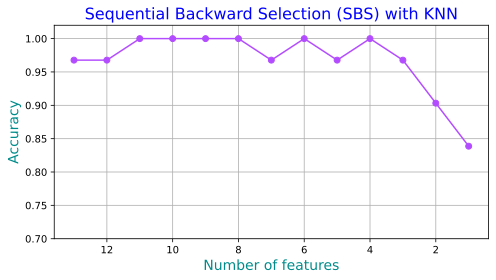

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]

plt.figure(figsize=(7, 4))
plt.title("Sequential Backward Selection (SBS) with KNN", fontsize=16, color='blue')
plt.plot(k_feat, sbs.scores_, marker='o', color=cmap(0.7))
plt.xlabel('Number of features', fontsize=14, color='darkcyan')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy', fontsize=14, color='darkcyan')
plt.grid()
# to go from 13 features to 1 instead of from 1 to 13
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    To satisfy our own curiosity, let’s see what the small feature subset (k=3) which yielded such a good performance looks like:

In [25]:
# 'sbs.subsets_[10]' is the set of remaining features when we have removed 10 of them; there are 13
# features at the start so it remains 3 of them, the 3 most important features
k3 = list(sbs.subsets_[10])
# 'df_wine.columns' is the set of columns' names of the 'df_wine' dataframe; 'df_wine.columns[1:]' is
# the set of names but starting at 1 (the 0-th is removed, it contains the labels of the wines, and
# was removed for the training dataset);
# 'df_wine.columns[1:][k3]' is thus the names of the 3 most important features
print(BB + "The 3 most important features are : " + MB, df_wine.columns[1:][k3].tolist(), "\n")

knn.fit(X_train_std, y_train)
print(BB + "Training accuracy when keeping all the features : " + MB, knn.score(X_train_std, y_train))
print(BB + "Test accuracy when keeping all the features : " + MB, knn.score(X_test_std, y_test), "\n")

knn.fit(X_train_std[:, k3], y_train)
print(BB + "Training accuracy when keeping only our 3 'best' features : " + MB, knn.score(X_train_std[:, k3], y_train))
print(BB + "Test accuracy when keeping only our 3 'best' features : " + MB, knn.score(X_test_std[:, k3], y_test))

The 3 most important features are :  ['Alcohol', 'Total phenols', 'Color intensity'] 

Training accuracy when keeping all the features :  0.9596774193548387
Test accuracy when keeping all the features :  0.9259259259259259 

Training accuracy when keeping only our 3 'best' features :  0.9354838709677419
Test accuracy when keeping only our 3 'best' features :  0.8888888888888888


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4d. Assessing feature importance with random forests</font><a id="4d"></a></p>$\quad$
        Another useful approach for selecting relevant features from a dataset is using a random forest (see part 3, "4d. Random forests"). Using a random forest, we can measure the feature
importance as the averaged impurity decrease computed from all decision trees in the forest. Conveniently, the random forest implementation in <font color='green'>scikit-learn</font> already collects the feature importance values for us so that we can access them via the '$\,$<font color='green'>feature_importances_</font>$\,$' attribute after fitting a '<font color='green'>RandomForestClassifier</font>'. By executing the following code, we will now train a forest of 500 trees on the wine dataset and rank the 13 features by their respective importance measures :

 1) Proline               0.179927
 2) Color intensity       0.153158
 3) Flavanoids            0.146123
 4) Alcohol               0.138224
 5) OD280/OD315 of diluted wines 0.114818
 6) Hue                   0.077525
 7) Total phenols         0.058236
 8) Malic acid            0.030856
 9) Alcalinity of ash     0.030000
10) Proanthocyanins       0.025713
11) Magnesium             0.025135
12) Nonflavanoid phenols  0.011548
13) Ash                   0.008738


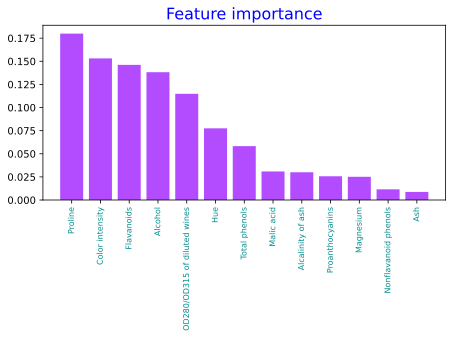

In [26]:
from sklearn.ensemble import RandomForestClassifier
# collects the columns' names starting at 1 (the 0-th column contains the labels)
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
# 'feature_importances_' is an attribute of the trained Random Forest model that contains an array of
# importance scores for each feature. The importance score reflects how much each feature contributes
# to the predictive performance of the model. Higher values indicate more important features.
importances = forest.feature_importances_
# 'np.argsort(importances)' returns an array of indices that would sort the importances array in
# ascending order; '[::-1]' reverses the order of the array, effectively sorting the importances
# array in descending order
indices = np.argsort(importances)[::-1]
# 'X_train.shape[1]' is the number of features (columns) of X_train
for f in range(X_train.shape[1]):
    #* '%2d' is a format specifier for an integer (d) with a width of 2. It is used to print the
    # feature index (f + 1) with at least two characters, adding leading zeros if necessary
    #* '%-*s' is a format specifier for a string (s) with a variable width specified by the value
    # before the asterisk (*). The minus sign (-) indicates left alignment. It is used to print the
    # feature label (feat_labels[indices[f]]) with a width of 30 characters
    #* '%f' simply announces that there is a floating point to print, 'importances[indices[f]]'
    print(BB + "%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]] + MB, importances[indices[f]]))

plt.title('Feature importance', fontsize=16, color='blue')
# create a bar diagram where the x-axis represents the indices of the columns in X_train, the y-axis
# represents the feature importances (in descending order), and the bars are centered on the
# horizontal ticks
plt.bar(range(X_train.shape[1]), importances[indices], align='center', color=cmap(0.7))
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90, fontsize=8, color="darkcyan")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<br><br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    We can conclude that the "proline" and "flavonoids" levels, the "color intensity", the "OD280/OD315" diffraction, and the "alcohol" concentration of wine are the most discriminative features in the dataset based on the average impurity decrease in the 500 decision trees. Interestingly, only two of the top-ranked features in the plot are also among the "three most important features" from the SBS algorithm that we implemented in the previous section ("alcohol" concentration and "OD280/OD315 of diluted wines").<br>$\quad$
    However, as far as interpretability is concerned, the random forest technique comes with an important gotcha that is worth mentioning. If two or more features are highly correlated, one feature may be ranked very highly while the information on the other feature(s) may not be fully captured. On
the other hand, we don’t need to be concerned about this problem if we are merely interested in the
predictive performance of a model rather than the interpretation of feature importance values.<br><br>$\quad$
    <font color='green'>scikit-learn</font> also implements a '$\,$<font color='green'>SelectFromModel<font color='darkblue'>$\,$' object that selects features based on a user-specified threshold after model fitting, which is useful if we want to use the RandomForestClassifier as a feature selector :

In [27]:
from sklearn.feature_selection import SelectFromModel
# our 'forest' estimator has been fitted already, so 'prefit' is True
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print(BB + "Number of features that meet the threshold criterion : " + MB, X_selected.shape[1])
for f in range(X_selected.shape[1]):
    # same as in the previous cell
    print(BB + "%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]] + MB, importances[indices[f]]))

Number of features that meet the threshold criterion :  5
 1) Proline               0.179927
 2) Color intensity       0.153158
 3) Flavanoids            0.146123
 4) Alcohol               0.138224
 5) OD280/OD315 of diluted wines 0.114818
